In [1]:
#imports
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file

In [2]:
#Load Data
ski_data = pd.read_csv('../clean_data/ski_data_step3_features.csv')
ski_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort,Yosemite Ski & Snowboard Area,Dodge Ridge,Donner Ski Ranch,Mammoth Mountain Ski Area,Mt. Shasta Ski Park
Region,Alaska,Alaska,Alaska,Arizona,Arizona,Northern California,Sierra Nevada,Sierra Nevada,Sierra Nevada,Sierra Nevada
state,Alaska,Alaska,Alaska,Arizona,Arizona,California,California,California,California,California
summit_elev,3939,2600,2090,11500,11100,7800,8200,8012,11053,6890
vertical_drop,2500,1540,294,2300,1800,600,1600,750,3100,1435
base_elev,250,1200,1796,9200,9200,7200,6600,7031,7953,5500
trams,1,0,0,0,0,0,0,0,3,0
fastSixes,0,0,0,1,0,0,0,0,2,0
fastQuads,2,0,0,0,1,0,0,0,9,0
quad,2,0,0,2,2,0,1,0,1,0


In [3]:
#Big Mountain Data
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']

In [4]:
big_mountain.T

,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3
quad,2


In [5]:
ski_data.shape

(277, 36)

In [6]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']

In [7]:
ski_data.shape

(276, 36)

In [8]:
#Train/Test Split
#important to not train ML on all the data as to not over-fit
len(ski_data) * .7, len(ski_data) * .3

(193.2, 82.8)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(ski_data.drop(columns='AdultWeekend'), 
                                                    ski_data.AdultWeekend, test_size=0.3, 
                                                    random_state=47)

In [10]:
X_train.shape, X_test.shape

((193, 35), (83, 35))

In [11]:
y_train.shape, y_test.shape

((193,), (83,))

In [12]:
#save the 'Name', 'state', 'Region' columns from the train/test data into names_train and names_test
#then drop the columns from X_train and x_test
names_list = ['Name', 'state', 'Region']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace= True)
X_test.drop(columns=names_list, inplace=True)

In [13]:
X_train.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
resorts_per_state                 

In [14]:
X_test.dtypes

summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                        float64
resorts_per_state                 

In [15]:
#Initial Not-Even-A-Model
#calc mean of y_train
train_mean = y_train.mean()
train_mean

63.811088082901556

In [16]:
dumb_reg= DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[63.81108808]])

In [17]:
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [18]:
y_tr_pred = train_mean * np.ones(len(y_train))
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [19]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [20]:
r_squared(y_train,y_tr_pred)

0.0

In [21]:
y_te_pred  = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.0031235200417913944

In [22]:
#Code task 7#
#Calculate the MAE as defined above
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [23]:
mae(y_train, y_tr_pred)

17.923463717146785

In [24]:
mae(y_test, y_te_pred)

19.136142081278486

In [25]:
#Calculate the MSE 
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [26]:
mse(y_train, y_tr_pred)

614.1334096969057

In [27]:
mse(y_test, y_te_pred)

581.4365441953481

In [28]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([24.78171523, 24.11299534])

In [29]:
#r-squared
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0031235200417913944)

In [30]:
#Mean absolute error
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(17.92346371714677, 19.136142081278486)

In [31]:
#mean squared error
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(614.1334096969046, 581.4365441953483)

In [32]:
#initial models
#imputing missing feature (predictor) values
X_defaults_median = X_train.median()
X_defaults_median

summit_elev                           2215.000000
vertical_drop                          750.000000
base_elev                             1300.000000
trams                                    0.000000
fastSixes                                0.000000
fastQuads                                0.000000
quad                                     1.000000
triple                                   1.000000
double                                   1.000000
surface                                  2.000000
total_chairs                             7.000000
Runs                                    28.000000
TerrainParks                             2.000000
LongestRun_mi                            1.000000
SkiableTerrain_ac                      170.000000
Snow Making_ac                          96.500000
daysOpenLastYear                       109.000000
yearsOpen                               57.000000
averageSnowfall                        120.000000
projectedDaysOpen                      115.000000


In [33]:
#use .fillna() to fill in missing values in X_train and X_test with the values in X_defaults_median
X_tr= X_train.fillna(X_defaults_median)
X_te= X_test.fillna(X_defaults_median)

In [34]:
#Scale the data 
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [35]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [36]:
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [37]:
#assess model performance
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.8177988515690603, 0.7209725843435144)

In [38]:
#much lower R2 for test data vs training suggests overfitting

In [39]:
#calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(8.547850301825427, 9.407020118581318)

In [40]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(111.8958125365848, 161.73156451192273)

In [41]:
#test imputing the mean values for missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

summit_elev                           4074.554404
vertical_drop                         1043.196891
base_elev                             3020.512953
trams                                    0.103627
fastSixes                                0.072539
fastQuads                                0.673575
quad                                     1.010363
triple                                   1.440415
double                                   1.813472
surface                                  2.497409
total_chairs                             7.611399
Runs                                    41.188482
TerrainParks                             2.434783
LongestRun_mi                            1.293122
SkiableTerrain_ac                      448.785340
Snow Making_ac                         129.601190
daysOpenLastYear                       110.100629
yearsOpen                               56.559585
averageSnowfall                        162.310160
projectedDaysOpen                      115.920245


In [42]:
#mean values are much higher than the median values


In [43]:
#apply imputation to training and test splits
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_te.fillna(X_defaults_mean)

In [44]:
#scale data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [45]:
#train model
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [46]:
#predict model
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [47]:
#assess model
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8170154093990024, 0.7146681800816373)

In [48]:
#MAE
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.536884040670977, 9.374379155954378)

In [49]:
#MSE
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(112.37695054778278, 165.3857615813759)

In [50]:
#not much difference in imputing median vs mean, over-training could be responsible, or other feature transformation(log etc)
# or not using all features

In [51]:
#defince pipeline
pipe = make_pipeline(SimpleImputer(strategy='median'),
                    StandardScaler(), 
                    LinearRegression())

In [52]:
type(pipe)

sklearn.pipeline.Pipeline

In [53]:
hasattr(pipe, 'fit'),  hasattr(pipe, 'predict')

(True, True)

In [54]:
#call fit() method with X_train and y_train
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [55]:
#predict
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [56]:
#assess
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8177988515690603, 0.7209725843435144)

In [57]:
#compare with earlier result not using pipeline
median_r2

(0.8177988515690603, 0.7209725843435144)

In [58]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.547850301825427, 9.407020118581318)

In [59]:
median_mae

(8.547850301825427, 9.407020118581318)

In [60]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(111.8958125365848, 161.73156451192273)

In [61]:
median_mse

(111.8958125365848, 161.73156451192273)

In [62]:
#pipeline working correctly

In [63]:
#Refining the Linear Model
pipe = make_pipeline(SimpleImputer(strategy= 'median'),
                    StandardScaler(), 
                    SelectKBest(f_regression),
                    LinearRegression())

In [64]:
#fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fc4f1c46790>)),
                ('linearregression', LinearRegression())])

In [65]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [66]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7674914326052744, 0.6259877354190834)

In [67]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.501495079727484, 11.201830190332055)

In [68]:
#MAE is worse using the default k=10 for SelectKBest

In [69]:
#modify SelectKBest for k = 15
pipe15 = make_pipeline(SimpleImputer(strategy='median'),
                      StandardScaler(),
                      SelectKBest(f_regression, k=15),
                      LinearRegression())

In [70]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7fc4f1c46790>)),
                ('linearregression', LinearRegression())])

In [71]:
#assess 
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [72]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7924096060483825, 0.6376199973170797)

In [73]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.211767769307114, 10.488246867294357)

In [74]:
#Assessing using cross-validation
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [75]:
cv_scores = cv_results['test_score']
cv_scores

array([0.63760862, 0.72831381, 0.74443537, 0.5487915 , 0.50441472])

In [76]:
np.mean(cv_scores), np.std(cv_scores)

(0.6327128053007867, 0.09502487849877693)

In [77]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), 
          np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.44, 0.82])

In [78]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [79]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [80]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [81]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fc4f1c46790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [82]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [83]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 8}

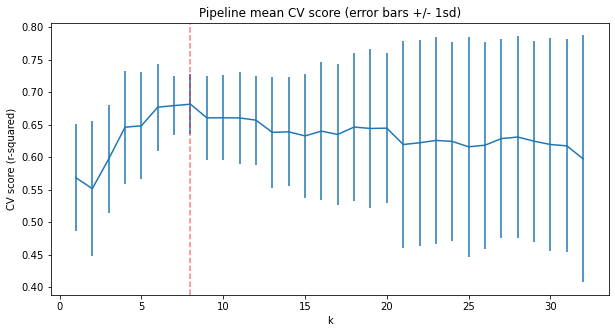

In [84]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [85]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()


In [87]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

vertical_drop        10.767857
Snow Making_ac        6.290074
total_chairs          5.794156
fastQuads             5.745626
Runs                  5.370555
LongestRun_mi         0.181814
trams                -4.142024
SkiableTerrain_ac    -5.249780
dtype: float64